### imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import community_visualization
    import correlations
    import TwitchGraphs
    import TwitchVisualization
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

## Visualização das correlações

#### Selecionar o País

In [2]:
# Escolher entre: DE, ENGB, ES, FR, PTBR, RU
country = "PTBR"

#### Definir o diretório correto

In [3]:
# Carregar dados
csv_path = base_dir / 'data' / country / 'processed_data' / f"twitch_network_analysis_{country}.csv"
output_dir = base_dir / 'docs' / "Imagens"
output_dir.mkdir(exist_ok=True)

# Ler dados
df = pd.read_csv(csv_path)
df.head()

,node,degree,avg_clustering,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank_centrality,clustering_coef,louvain_community,...,profile_pic,broadcaster_type,game_name,GameType,day_of_year,is_leap,days_in_year,normalized_day,sin_created_at,cos_created_at
0,1706,82,0.319895,0.042909,0.431280,0.002360,0.018123,0.001325,0.104185,0,...,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,StarCraft II,Online,168.0,False,365,2.874772,0.263665,-0.964614
1,1273,8,0.319895,0.004186,0.370421,0.000007,0.003015,0.000181,0.321429,0,...,https://static-cdn.jtvnw.net/jtv_user_pictures...,non_Streamer,NaN,Non_Content_Available,109.0,False,365,1.859134,0.958718,-0.284359
2,313,16,0.319895,0.008373,0.418345,0.000003,0.013024,0.000269,0.608333,1,...,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,Throne and Liberty,Online,17.0,False,365,0.275427,0.271958,0.962309
3,1570,8,0.319895,0.004186,0.417249,0.000056,0.004507,0.000190,0.285714,2,...,https://static-cdn.jtvnw.net/jtv_user_pictures...,affiliate,FINAL FANTASY XIV ONLINE,Online,109.0,True,366,1.854055,0.960150,-0.279486
4,800,2,0.319895,0.001047,0.320530,0.000005,0.000322,0.000113,0.000000,6,...,https://static-cdn.jtvnw.net/jtv_user_pictures...,non_Streamer,Dengeki Bunko: Fighting Climax Ignition,Online,7.0,False,365,0.103285,0.103102,0.994671


### Arranjar o tipo das variáveis

In [4]:
df.columns

Index(['node', 'degree', 'avg_clustering', 'degree_centrality',
       'closeness_centrality', 'betweenness_centrality',
       'eigenvector_centrality', 'pagerank_centrality', 'clustering_coef',
       'louvain_community', 'lp_community', 'k_core', 'id', 'days', 'mature',
       'views', 'partner', 'new_id', 'username', 'created_at', 'profile_pic',
       'broadcaster_type', 'game_name', 'GameType', 'day_of_year', 'is_leap',
       'days_in_year', 'normalized_day', 'sin_created_at', 'cos_created_at'],
      dtype='object')

In [5]:
if "avg_clustering" in df.columns:
    df.drop(columns=["avg_clustering"], inplace=True)
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')
df['created_year'] = df['created_at'].dt.year
df['mature'] = df['mature'].astype(int)
df.drop(columns=['id', 'node', 'new_id', 'username', 'profile_pic', 'created_at', 
                      'day_of_year', 'normalized_day', 'is_leap', 'days_in_year', 'partner', 
                      "sin_created_at", "cos_created_at", "game_name"], inplace=True)
df.head()

,degree,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank_centrality,clustering_coef,louvain_community,lp_community,k_core,days,mature,views,broadcaster_type,GameType,created_year
0,82,0.042909,0.431280,0.002360,0.018123,0.001325,0.104185,0,0,32,4206,0,929459,affiliate,Online,2013.0
1,8,0.004186,0.370421,0.000007,0.003015,0.000181,0.321429,0,0,8,3900,0,11194,non_Streamer,Non_Content_Available,2014.0
2,16,0.008373,0.418345,0.000003,0.013024,0.000269,0.608333,1,0,16,2896,0,2850,affiliate,Online,2017.0
3,8,0.004186,0.417249,0.000056,0.004507,0.000190,0.285714,2,0,8,3170,1,3422,affiliate,Online,2016.0
4,2,0.001047,0.320530,0.000005,0.000322,0.000113,0.000000,6,0,2,2541,0,71,non_Streamer,Online,2018.0


In [6]:
df.dtypes

degree                      int64
degree_centrality         float64
closeness_centrality      float64
betweenness_centrality    float64
eigenvector_centrality    float64
pagerank_centrality       float64
clustering_coef           float64
louvain_community           int64
lp_community                int64
k_core                      int64
days                        int64
mature                      int64
views                       int64
broadcaster_type           object
GameType                   object
created_year              float64
dtype: object

#### Extras

In [7]:
# Criar a variável binária 'is_popular_game'
df['is_offline'] = df['GameType'].apply(lambda x: 1 if x == "Offline" else 0)
df['is_nonGame'] = df['GameType'].apply(lambda x: 1 if x == "Non-Videogame" else 0)
df['is_partner'] = df['broadcaster_type'].apply(lambda x: 1 if x == "partner" else 0)

df.drop(["GameType"], axis=1, inplace=True)
df.drop(["broadcaster_type"], axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Remover linhas com nulos para treino
dados_validos = df.dropna(subset=["created_year"]).copy()
dados_faltantes = df[df["created_year"].isna()].copy()

# Selecionar características e target
X = dados_validos.drop(columns=["created_year"])
y = dados_validos["created_year"]

# Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_treino, y_treino)

# Prever os valores para os dados faltantes
X_faltantes = dados_faltantes.drop(columns=["created_year"])
dados_faltantes.loc[:, "created_year"] = modelo.predict(X_faltantes)

# Combinar os dados e manter a ordem original
df = pd.concat([dados_validos, dados_faltantes]).sort_index()
df['created_year'] = df['created_year'].astype(int)

In [9]:
linhas_com_nulos = df[df.isna().any(axis=1)]
linhas_com_nulos

,degree,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank_centrality,clustering_coef,louvain_community,lp_community,k_core,days,mature,views,created_year,is_offline,is_nonGame,is_partner


### Correlações

In [10]:
df.columns

Index(['degree', 'degree_centrality', 'closeness_centrality',
       'betweenness_centrality', 'eigenvector_centrality',
       'pagerank_centrality', 'clustering_coef', 'louvain_community',
       'lp_community', 'k_core', 'days', 'mature', 'views', 'created_year',
       'is_offline', 'is_nonGame', 'is_partner'],
      dtype='object')

In [11]:
numeric_cols = ['degree', 'degree_centrality', 'closeness_centrality', 'betweenness_centrality', 
                'eigenvector_centrality', 'pagerank_centrality', 'clustering_coef', 'days', 'views', 'created_year']
categorical_cols = ['louvain_community', 'lp_community', 'k_core', 'is_offline', 'is_partner', 'mature', 'is_nonGame']

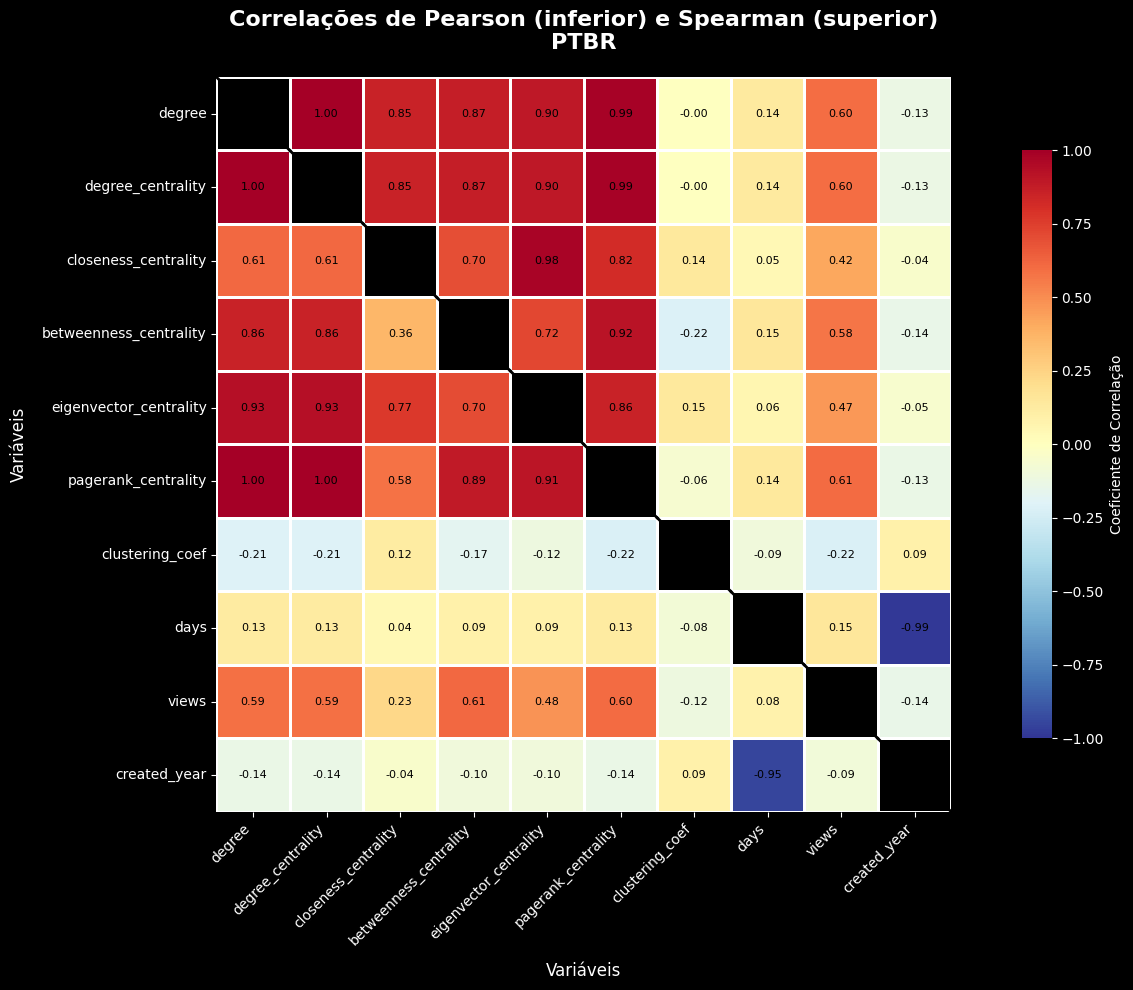

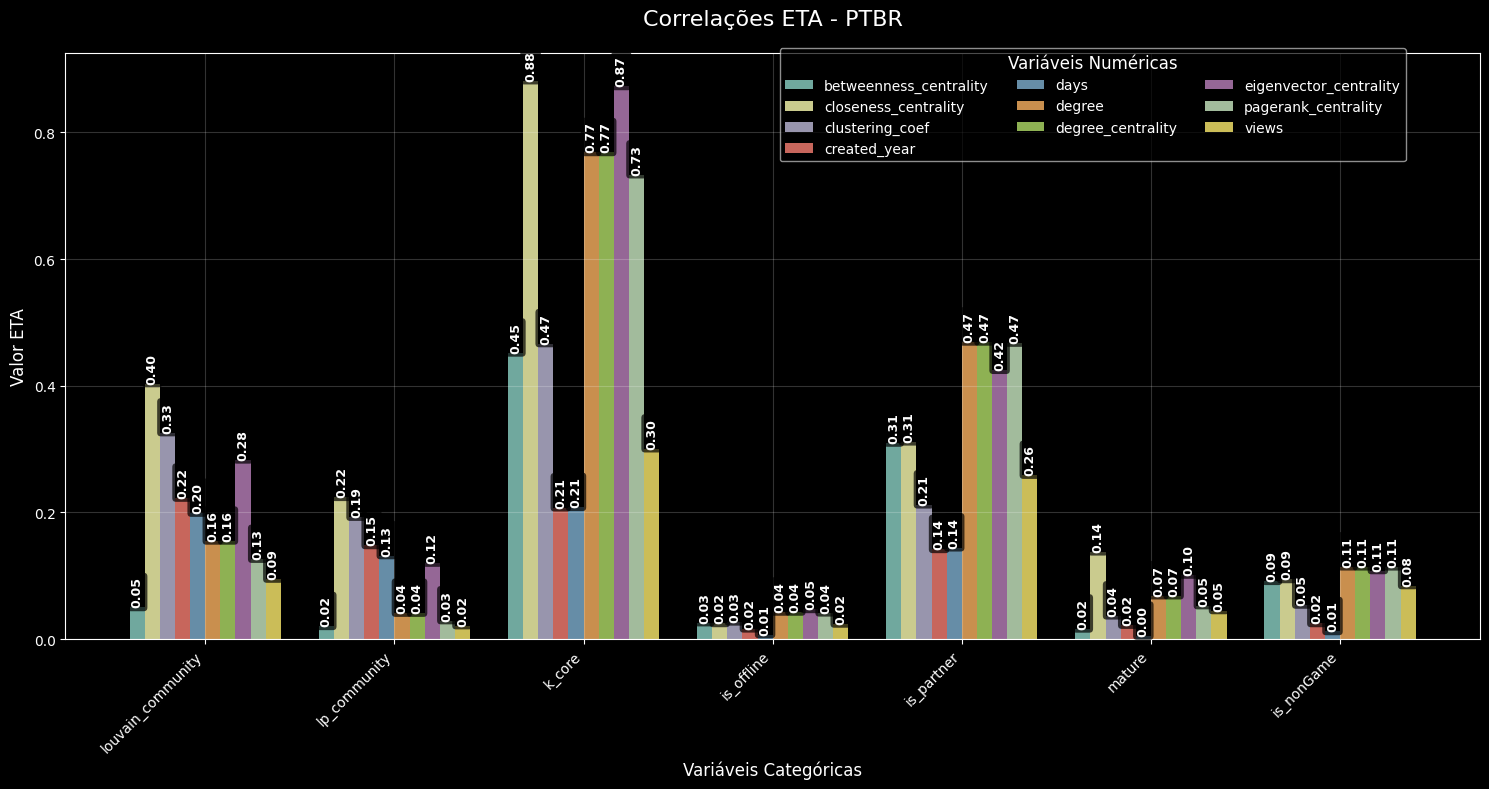

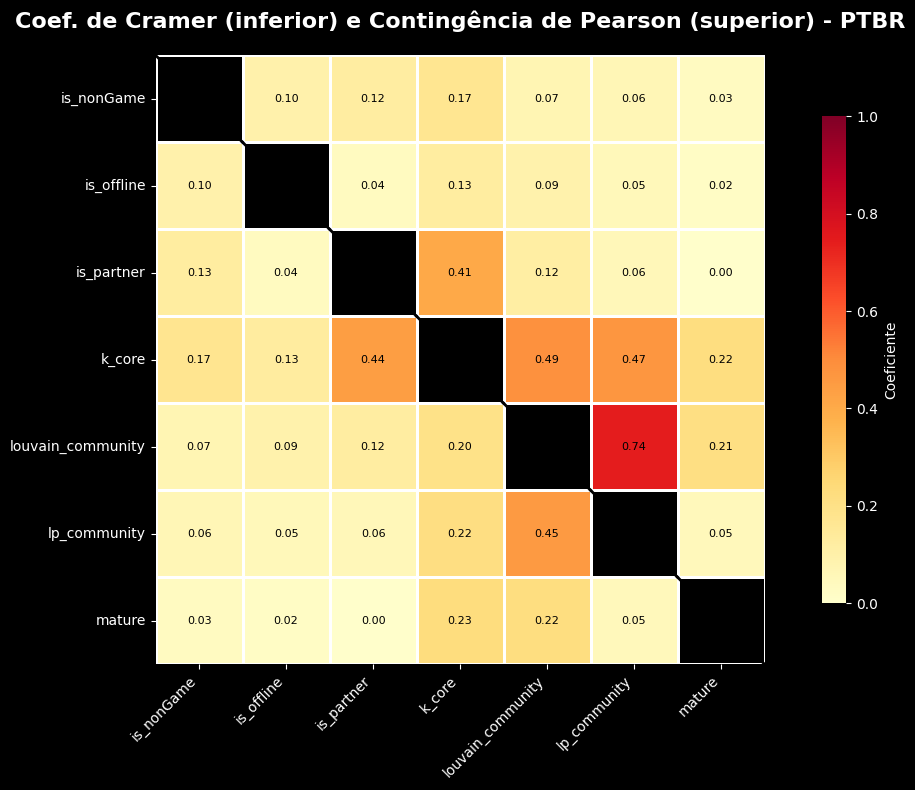

In [12]:
# Calcular correlações
x = correlations.calculate_correlations(df, country, output_dir, numeric_cols, categorical_cols)

### Visualizar a relação entre as variáveis

#### Lineplot

In [13]:
numeric_cols

['degree',
 'degree_centrality',
 'closeness_centrality',
 'betweenness_centrality',
 'eigenvector_centrality',
 'pagerank_centrality',
 'clustering_coef',
 'days',
 'views',
 'created_year']

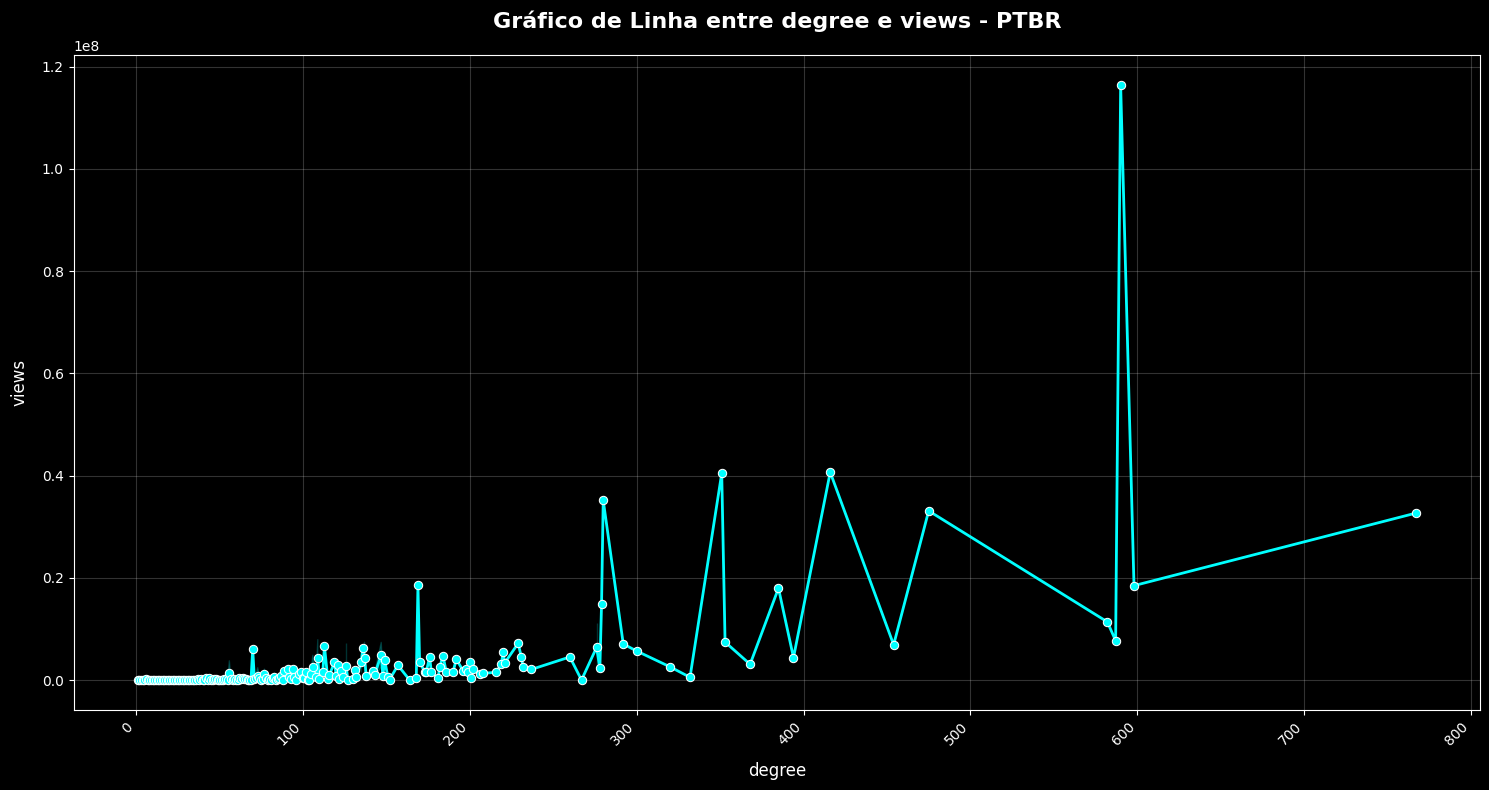

In [14]:
# Supondo que já tenha um DataFrame df com as variáveis 'var1' e 'var2'
correlations.plot_lineplot(df, 'degree', 'views', country, output_dir)

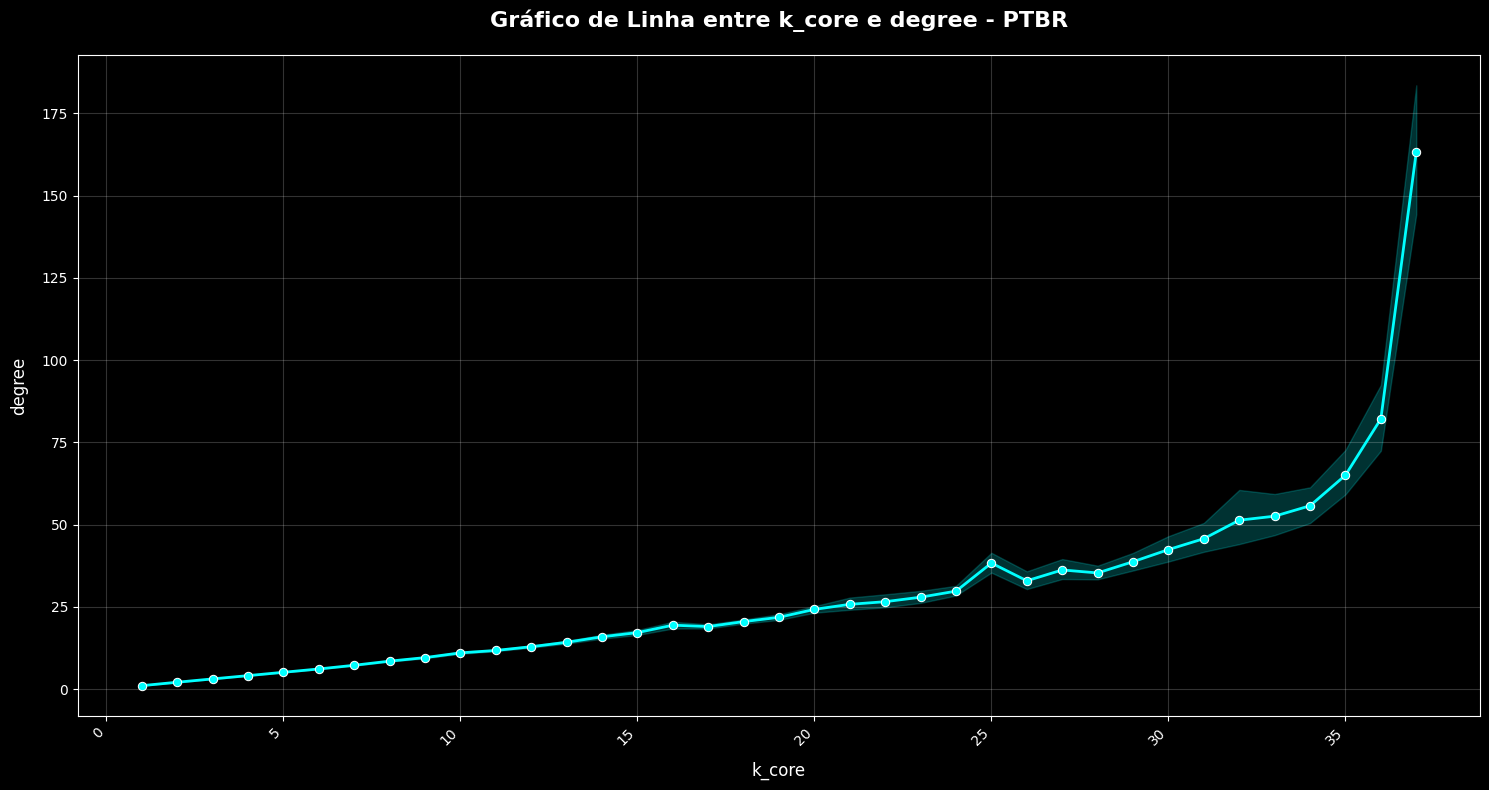

In [15]:
correlations.plot_lineplot(df, 'k_core', 'degree', country, output_dir)

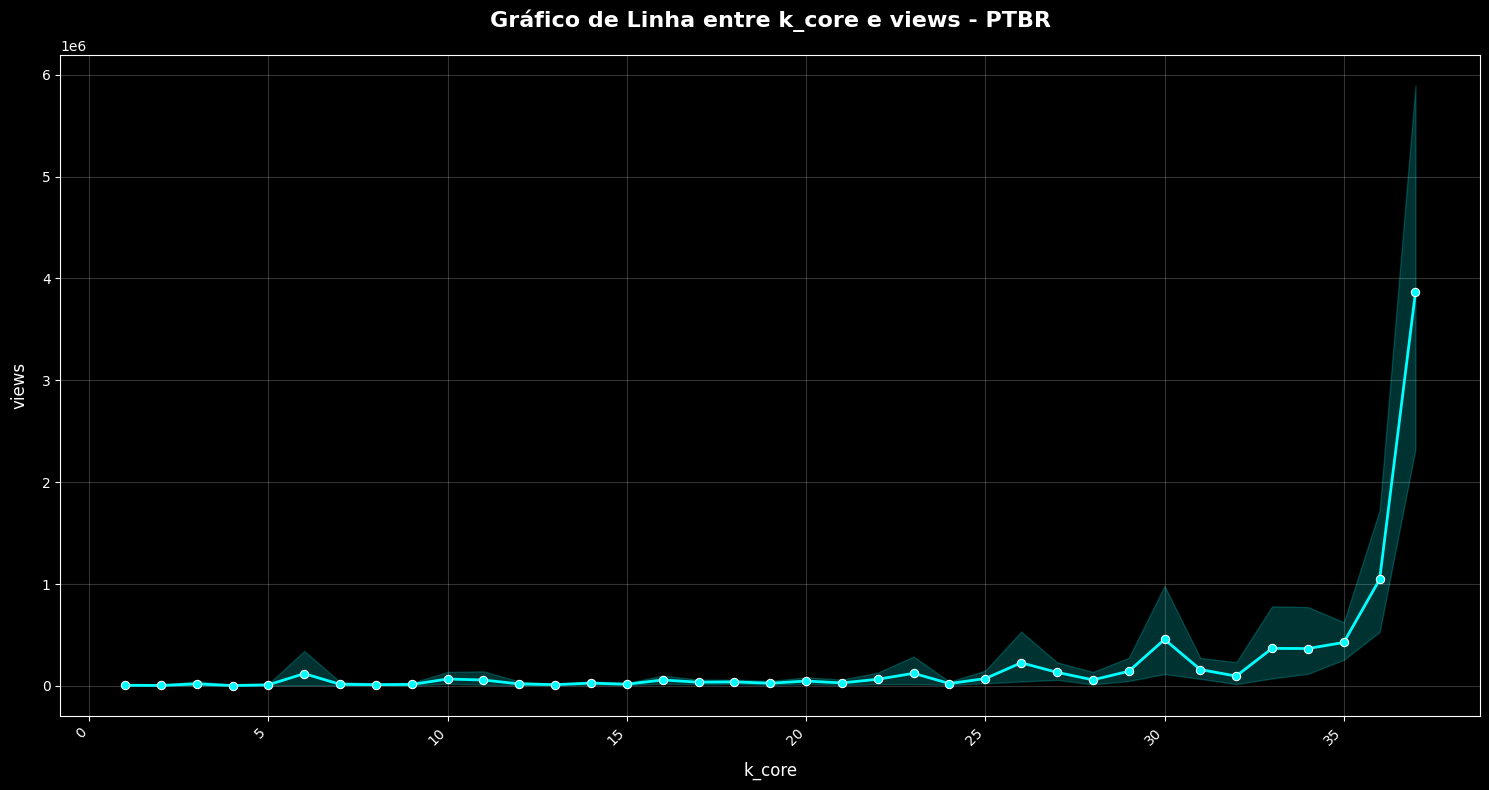

In [16]:
correlations.plot_lineplot(df, 'k_core', 'views', country, output_dir)

#### Violin Plot

In [17]:
numeric_cols

['degree',
 'degree_centrality',
 'closeness_centrality',
 'betweenness_centrality',
 'eigenvector_centrality',
 'pagerank_centrality',
 'clustering_coef',
 'days',
 'views',
 'created_year']

In [18]:
categorical_cols

['louvain_community',
 'lp_community',
 'k_core',
 'is_offline',
 'is_partner',
 'mature',
 'is_nonGame']

C:\Users\diogo\Desktop\ARA\Projeto\Twitch\src\visualization\correlations.py:452: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=var1, y=var2, palette='Blues', inner="point", linewidth=2)


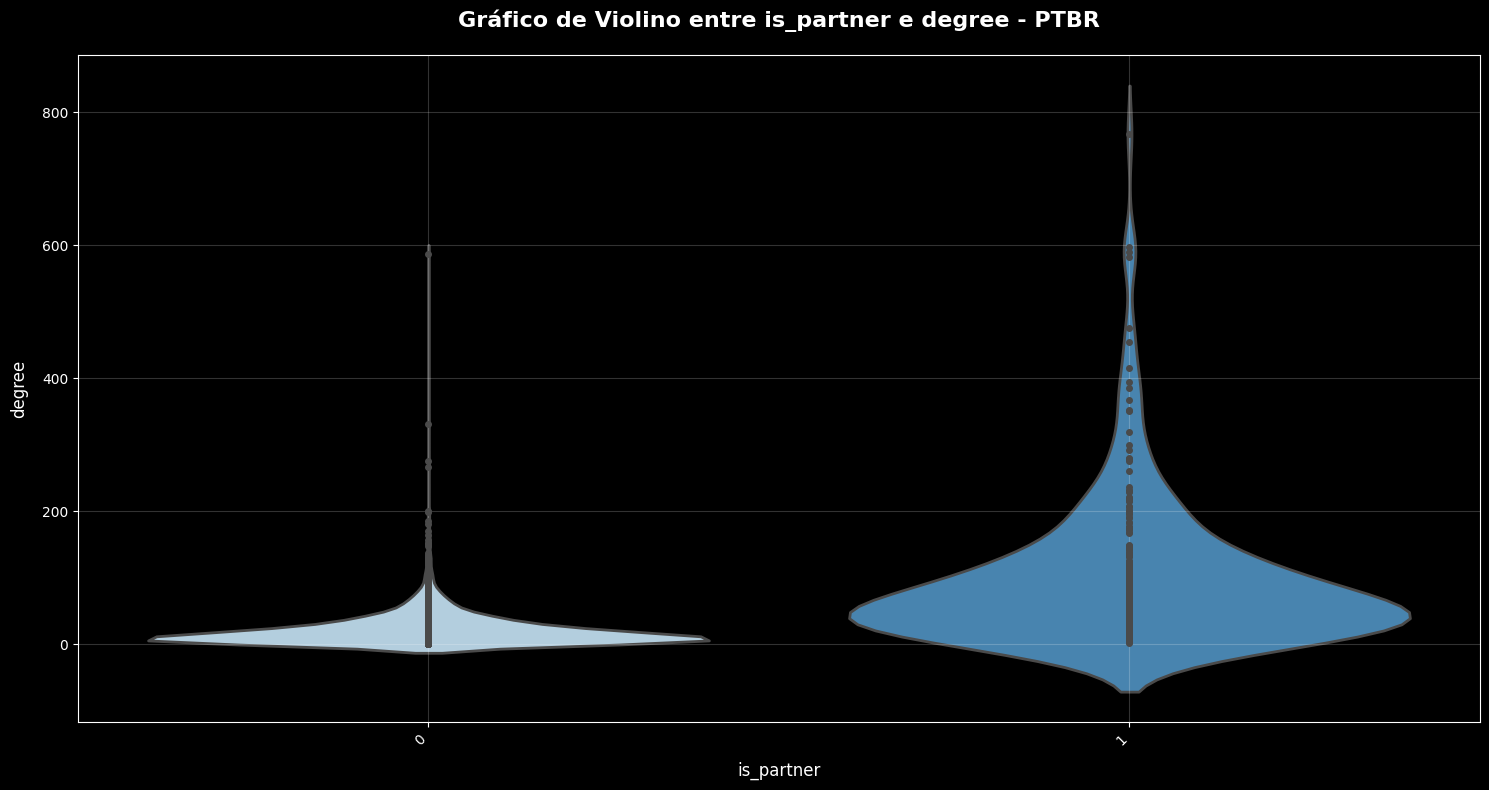

In [19]:
correlations.plot_violinplot(df, 'is_partner', 'degree', country, output_dir)

### Extra

In [20]:
categorical_cols

['louvain_community',
 'lp_community',
 'k_core',
 'is_offline',
 'is_partner',
 'mature',
 'is_nonGame']

In [21]:
numeric_cols

['degree',
 'degree_centrality',
 'closeness_centrality',
 'betweenness_centrality',
 'eigenvector_centrality',
 'pagerank_centrality',
 'clustering_coef',
 'days',
 'views',
 'created_year']

<Figure size 1500x800 with 0 Axes>

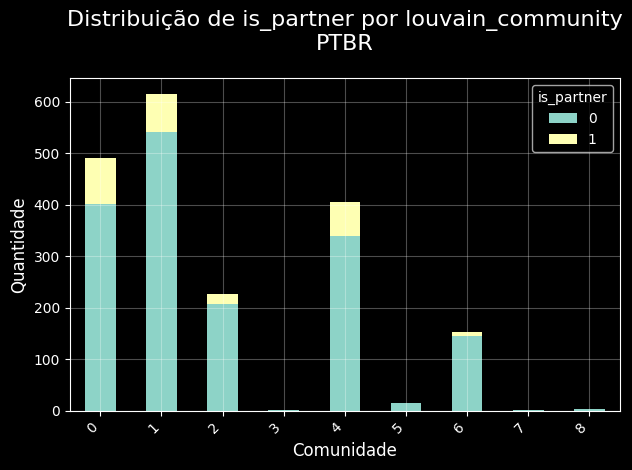

In [22]:
TwitchGraphs.plot_community_distribution(df, 'is_partner', 'louvain_community', country, output_dir)

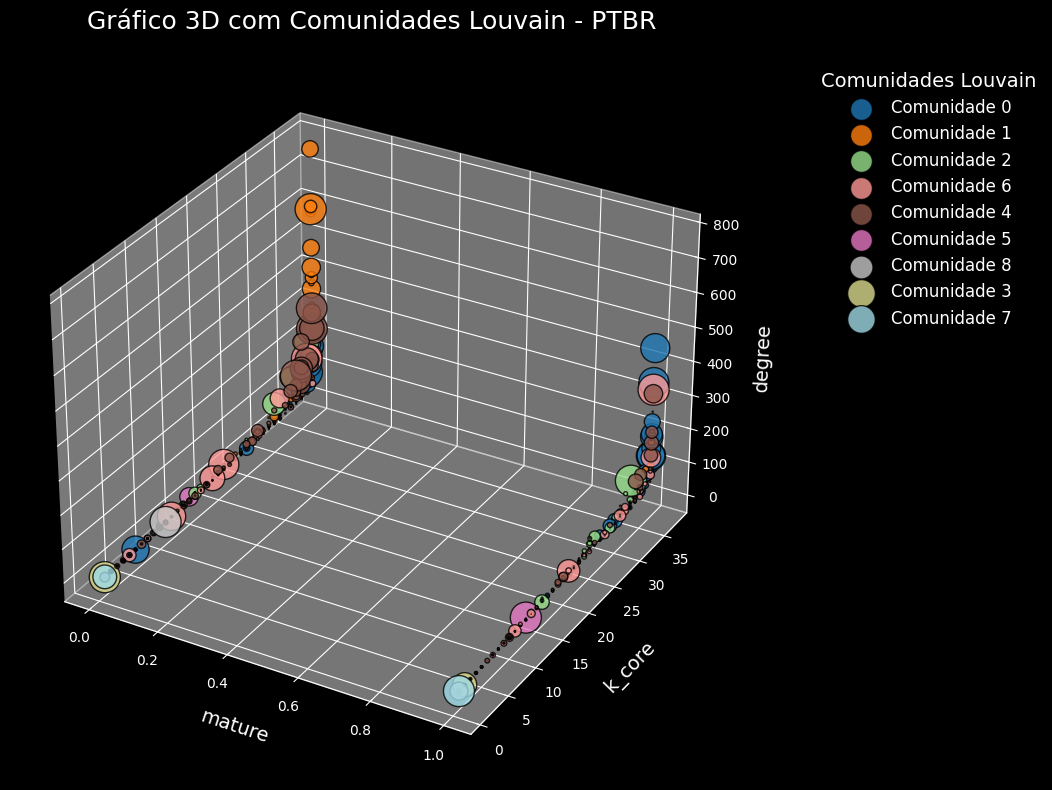

Gráfico 3D salvo em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\docs\Imagens\NoteBook3\3D_Plots\plot3d_mature_k_core_degree_PTBR.png


In [23]:
correlations.plot_3d_with_louvain(df, 'mature', 'k_core', 'degree', 'louvain_community', 'views', country, output_dir)